In [22]:
import numpy
import scipy.special

7
7 correct label
7 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
5 correct label
9 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
0 correct label
0 

array([[0.08944307],
       [0.01093753],
       [0.0084346 ],
       [0.00779159],
       [0.00266795],
       [0.00582911],
       [0.99064245],
       [0.00205077],
       [0.0015518 ],
       [0.00207445]])

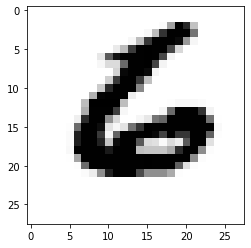

In [23]:
import scipy.special
import numpy
import matplotlib.pyplot

#定義類神經網路
class neturalNetwork:
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
        self.inodes=inputnodes
        self.hnodes=hiddennodes
        self.onodes=outputnodes
        
        #初始化權重
        self.wih=numpy.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))
        self.who=numpy.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes))
        
        self.lr=learningrate
        
        #激活函數(logistic sigmoid)
        self.activation_function=lambda x:scipy.special.expit(x)
        pass
    
    def train(self,inputs_list,targets_list):
        #匯入資料
        #將資料轉換為2d
        inputs=numpy.array(inputs_list,ndmin=2).T
        targets=numpy.array(targets_list,ndmin=2).T
        #神經元計算
        hidden_inputs=numpy.dot(self.wih,inputs)
        hidden_outputs=self.activation_function(hidden_inputs)
        final_inputs=numpy.dot(self.who,hidden_outputs)
        final_outputs=self.activation_function(final_inputs)
        
        #計算誤差，更新權重
        output_errors=targets-final_outputs
        #進行隱藏層誤差計算
        hidden_errors=numpy.dot(self.who.T,output_errors)
        #更新權重
        self.who+=self.lr*numpy.dot((output_errors*final_outputs*(1.0-final_outputs)),numpy.transpose(hidden_outputs))
        self.wih+=self.lr*numpy.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)),numpy.transpose(inputs))
        pass
    
    #只需要輸入一個input list即可
    #用來測試結果
    def query(self,inputs_list):
        inputs=numpy.array(inputs_list,ndmin=2).T
        #計算信號到隱藏層
        hidden_inputs=numpy.dot(self.wih,inputs)
        #激活函數計算
        hidden_outputs=self.activation_function(hidden_inputs)
        #輸出
        final_inputs=numpy.dot(self.who,hidden_outputs)
        #輸出層
        final_outputs=self.activation_function(final_inputs)
        return final_outputs

#初始值
input_nodes=784
hidden_nodes=100
output_nodes=10
learning_rate=0.2

#建立物件
n=neturalNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

#匯入訓練資料集
training_data_file=open('mnist_train.csv','r')
training_data_list=training_data_file.readlines()
training_data_file.close()

#訓練類神經網路
for record in training_data_list:
    all_values=record.split(',')
    inputs=(numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
    targets=numpy.zeros(output_nodes)+0.01
    targets[int(all_values[0])]=0.99
    n.train(inputs,targets)


#匯入測試資料集
test_data_file=open('mnist_test.csv','r')
test_data_list=test_data_file.readlines()
test_data_file.close()

all_values=test_data_list[0].split(',')
print(all_values[0])


scorecard=[]
for record in test_data_list:
    all_values=record.split(',')
    correct_label=int(e[0])
    print(correct_label,"correct label")
    inputs=(numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
    outputs=n.query(inputs)
    label=numpy.argmax(outputs)
    print(label,"network's answer")
    if (label==correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass

print(scorecard)

score_array=numpy.asarray(scorecard)
print("performance=",score_array.sum()/score_array.size)

image_array=numpy.asfarray(all_values[1:]).reshape(28,28)
matplotlib.pyplot.imshow(image_array,cmap="Greys",interpolation="None")

n.query((numpy.asfarray(all_values[1:])/255.0*0.99)+0.01)